# Kurze Einführung in Tensorflow

In [2]:
import tensorflow as tf

In [3]:
print(tf.__version__)

2.4.1


In [4]:
# Initialisieren mit Einern
x = tf.ones(shape=(2,1))

In [5]:
x

<tf.Tensor: shape=(2, 1), dtype=float32, numpy=
array([[1.],
       [1.]], dtype=float32)>

In [6]:
# Initialisieren mit Nullen
x = tf.zeros(shape=(2,1))

In [7]:
print(x)

tf.Tensor(
[[0.]
 [0.]], shape=(2, 1), dtype=float32)


In [8]:
# Initialisieren mit gaußverteilten Zufallszahlen
x = tf.random.normal(shape=(3,1),mean=0.,stddev=1.0)

In [9]:
tf.print(x)

[[-0.358763278]
 [-0.998625219]
 [1.67982483]]


In [10]:
x?

In [11]:
# Grundrechenarten
a = tf.ones((2, 2)) 
b = tf.square(a)
c = tf.sqrt(a) 
d = b + c
#e = tf.matmul(a, b) # normale matrix multiplication
e = a@b # fancy mat mul
e *= d # elementwise

In [12]:
# Assignment geht in Numpy
import numpy as np
x = np.ones(shape=(2,2))
x[0,0] = 0.

In [13]:
# Aber nicht in Tensorflow - diese Tensoren sind Konstanten
# Wie in Mathe - wenn x = 1 dann kann nicht x = 3 sein. Neu definieren geht (wie oben), aber kein Assignment
x = tf.ones(shape=(2,2))
x[0,0] = 0.

TypeError: 'tensorflow.python.framework.ops.EagerTensor' object does not support item assignment

In [17]:
# Um Tensoren ändern zu können, müssen wir Variablen definieren
v = tf.Variable(initial_value=tf.random.normal(shape=(3,1)))
print(v)

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[-2.6510801],
       [-1.1280348],
       [ 1.0677115]], dtype=float32)>


In [18]:
vv = v+np.ones(shape=(3,1))
vv

<tf.Tensor: shape=(3, 1), dtype=float32, numpy=
array([[-1.6510801 ],
       [-0.12803483],
       [ 2.0677114 ]], dtype=float32)>

In [19]:
print(vv)

tf.Tensor(
[[-1.6510801 ]
 [-0.12803483]
 [ 2.0677114 ]], shape=(3, 1), dtype=float32)


In [20]:
# Jetzt kann man assignen, auch über .assign:
v.assign(tf.ones((3, 1)))

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[1.],
       [1.],
       [1.]], dtype=float32)>

In [21]:
# Etwas dazu addieren ...
v.assign_add(tf.ones((3, 1)))

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[2.],
       [2.],
       [2.]], dtype=float32)>

In [22]:
v = tf.zeros((3,1))  # Vorsicht: Jetzt änderst Du v in eine Konstante!

In [23]:
v.assign_add(tf.ones((3, 1)))

AttributeError: 'tensorflow.python.framework.ops.EagerTensor' object has no attribute 'assign_add'

## Berechnung von Gradienten in Tensorflow

Mithilfe der tf.GradientTape API lässt sich in Tensorflow automatisch differenzieren, d.h. Ableitungen verschiedener Rechenoperationen bzgl. aller variabler Inputs lassen sich berechnen. tf.GradientTape zeichnet die verschiedenen Operationen innerhalb des Kontextes auf und ermöglicht so die Berechnung der Ableitung mithilfe von "reverse mode autodiff" (https://en.wikipedia.org/wiki/Automatic_differentiation, https://arxiv.org/pdf/1811.05031.pdf).

In [24]:
# Gradienten berechnen: gradients = tape.gradient(loss, weights)
# Innerhalb des "Gradient Tape"-Scope werden Operationen aufgezeichnet, falls ein Input "beobachtet" wird
# tf.Variable werden immer beobachtet, weil der Sinn und Zweck von tf ja diese Gradientenberechnung ist.
# Die Gradienten der "aufgezeichneten" Operationen können automatisch berechnet werden.

input_var = tf.Variable(initial_value=3.)


with tf.GradientTape() as tape:     # Der Gradient Tape wird gestartet
    result = tf.square(input_var)   # Result wird aufgezeichnet
    
gradient = tape.gradient(result, input_var) # Wir können den Gradienten von result bezüglich input_var berechnen


In [25]:
gradient  # x^2 abgeleitet ist 2x an der Stelle 3 = 6

<tf.Tensor: shape=(), dtype=float32, numpy=6.0>

Auch tensorwertige Ableitungen lassen sich so berechnen

In [26]:
w = tf.Variable(tf.random.normal((3, 2)), name='w')
b = tf.Variable(tf.zeros(2, dtype=tf.float32), name='b')
x = [[1., 2., 3.]]

with tf.GradientTape() as tape:
    y = x@w + b
    loss = tf.reduce_mean(y**2)
    
grad = tape.gradient(loss, w)  
print("Gradient: \n", grad.numpy())

Gradient: 
 [[ 1.8639678  5.870421 ]
 [ 3.7279356 11.740842 ]
 [ 5.591903  17.611263 ]]


Ableitung: -1.5


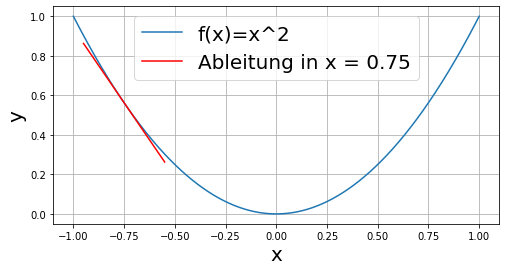

In [29]:
# So lässt sich einfach die Ableitung einer Funktion Berechnen
import matplotlib.pyplot as plt
x = tf.Variable(-0.75)
with tf.GradientTape() as tape:
    #tape.watch(x)
    y = x * x
g = tape.gradient(y, x) 
g.numpy()
print('Ableitung:', g.numpy())

plt.figure(figsize=(8, 4))
plt.grid(True)
x0 = np.linspace(-1,1,20000)
plt.plot(x0, x0*x0, label='f(x)=x^2')
plt.plot([x-0.2, x+0.2], x*x + g.numpy()*np.array([-0.2, +0.2]), label='Ableitung in x = 0.75', color='r')
plt.xlabel('x', fontsize=20)
plt.ylabel('y', fontsize=20)
plt.legend(fontsize=20)
plt.show()

In [31]:
# Ableitung an verschiedenen Stellen:
for x0 in np.linspace(-1, 1, 6):
    x = tf.Variable(x0)
    with tf.GradientTape() as tape:
        tape.watch(x)
        y = x * x
    g = tape.gradient(y, x) 
    print('Stelle x:',x0.round(2), 'Ableitung von x^2:', g.numpy().round(2))

Stelle x: -1.0 Ableitung von x^2: -2.0
Stelle x: -0.6 Ableitung von x^2: -1.2
Stelle x: -0.2 Ableitung von x^2: -0.4
Stelle x: 0.2 Ableitung von x^2: 0.4
Stelle x: 0.6 Ableitung von x^2: 1.2
Stelle x: 1.0 Ableitung von x^2: 2.0


# Übung

* Beschleunigung berechnen für etwas, was sich mit 4.9 * time^2 vorwärts bewegt.
* Beschleunigung ist die Ableitung der Geschwindigkeit 
* Geschwindigkeit ist die Ableitung der Vorwärtsbewegung


# Übung2
Wenn die Verzweiflung groß ist, dann macht erstmal diese einfacheren Sachen:
* Ableitung von der Wurzelfunktion berechnen an den Punkten 1, 0, -1
* Wo geht das schief? Geht das schief?
* Gradienten berechnen einer Funktion mit Tensorwertigem Input z.B. shape=(2,2)
* Vielleicht ein Dotprodukt mit sich selbst.

<tf.Tensor: shape=(), dtype=float32, numpy=inf>

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[1.6954399, 4.58066  ],
       [3.4255676, 6.310787 ]], dtype=float32)>

9.8


# Einen linearen Classifier mit Tensorflow bauen

In [29]:
# Daten generieren:

num_samples_per_class = 1000

negative_samples = np.random.multivariate_normal(
    mean=[0, 3], cov=[[1, 0.5],[0.5, 1]], size=num_samples_per_class) 

positive_samples = np.random.multivariate_normal(
    mean=[3, 0], cov=[[1, 0.5],[0.5, 1]], size=num_samples_per_class)

In [30]:
# Trainingsdaten: (vstack ist vertical stack, also vertikal aufeinanderstapeln --> entlang der Reihe)

inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)
targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype='float32'), np.ones((num_samples_per_class, 1), dtype='float32')))

In [31]:
inputs2 = np.concatenate([negative_samples, positive_samples],axis=0).astype(np.float32)

In [32]:
(inputs == inputs2).all().all()

True

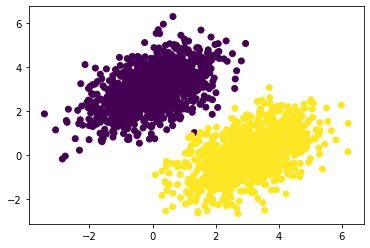

<Figure size 720x720 with 0 Axes>

In [33]:
# Visualisieren:
%matplotlib inline
import matplotlib.pyplot as plt
plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:, 0]) 
plt.figure(figsize=(10,10))
plt.show()

In [34]:
# Die Variablen

input_dim = 2
output_dim = 1

W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, output_dim))) 
b = tf.Variable(initial_value=tf.zeros(shape=(output_dim,)))

In [35]:
# Forward Pass Funktion
def model(inputs):
    return tf.matmul(inputs, W) + b

In [36]:
# Loss Funktion
def square_loss(targets, predictions): 
    per_sample_losses = tf.square(targets - predictions) 
    return tf.reduce_mean(per_sample_losses)

In [37]:
# Trainingstep
learning_rate = 0.1

def training_step(inputs, targets): 
    
    # Der Gradient
    with tf.GradientTape() as tape:     
        predictions = model(inputs) # Forward Pass
        loss = square_loss(predictions, targets)  # Loss dieser Vorhersagen
    grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W, b]) 
        
    # Der Update-Schritt - Gradient wird subtrahiert von den Weights
    W.assign_sub(grad_loss_wrt_W * learning_rate)
    b.assign_sub(grad_loss_wrt_b * learning_rate)
    
    return loss

In [38]:
# Das Training
for step in range(20):
    loss = training_step(inputs, targets) 
    print('Loss at step %d: %.4f' % (step, loss))

Loss at step 0: 0.1227
Loss at step 1: 0.0806
Loss at step 2: 0.0757
Loss at step 3: 0.0713
Loss at step 4: 0.0673
Loss at step 5: 0.0636
Loss at step 6: 0.0602
Loss at step 7: 0.0571
Loss at step 8: 0.0543
Loss at step 9: 0.0517
Loss at step 10: 0.0494
Loss at step 11: 0.0472
Loss at step 12: 0.0452
Loss at step 13: 0.0434
Loss at step 14: 0.0418
Loss at step 15: 0.0402
Loss at step 16: 0.0389
Loss at step 17: 0.0376
Loss at step 18: 0.0364
Loss at step 19: 0.0354


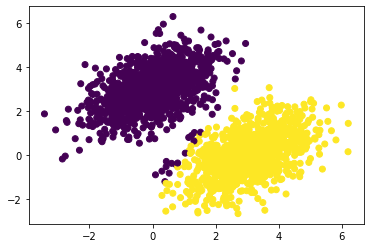

In [39]:
# Das Ergebnis
predictions = model(inputs)
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5) 
plt.show()

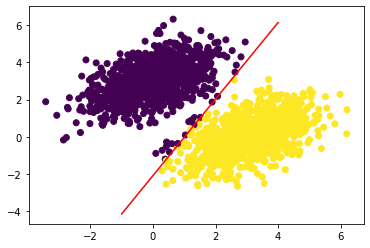

In [40]:
x = np.linspace(-1, 4, 100)  # gleichmäßig gesampelte x-Werte 
y = - W[0] / W[1] * x + (0.5 - b) / W[1]  # y-Werte 
plt.plot(x, y, '-r')
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)
plt.show()

In [41]:
W

<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[ 0.19983366],
       [-0.09720696]], dtype=float32)>

# Übung:
* Diese Klassifizierung ist ja nicht ideal
* Versucht ein neues Modell zu trainieren, dass ein Testset besser aufteilt
* Niedrigster Loss auf einem Testset gewinnt


In [103]:
# Test-Daten generieren:

num_samples_per_class = 1000

negative_samples = np.random.multivariate_normal(
    mean=[0, 3], cov=[[1, 0.5],[0.5, 1]], size=num_samples_per_class) 

positive_samples = np.random.multivariate_normal(
    mean=[3, 0], cov=[[1, 0.5],[0.5, 1]], size=num_samples_per_class)

test_inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)
test_targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype='float32'), np.ones((num_samples_per_class, 1), dtype='float32')))

In [104]:
# Trainingsdaten

num_samples_per_class = 100000

negative_samples = np.random.multivariate_normal(
    mean=[0, 3], cov=[[1, 0.5],[0.5, 1]], size=num_samples_per_class) 

positive_samples = np.random.multivariate_normal(
    mean=[3, 0], cov=[[1, 0.5],[0.5, 1]], size=num_samples_per_class)

train_inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)
train_targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype='float32'), np.ones((num_samples_per_class, 1), dtype='float32')))

In [105]:
# Das Training
for step in range(100):
    loss = training_step(train_inputs, train_targets) 
    print('Loss at step %d: %.4f' % (step, loss))

Loss at step 0: 0.0488
Loss at step 1: 0.0466
Loss at step 2: 0.0447
Loss at step 3: 0.0430
Loss at step 4: 0.0414
Loss at step 5: 0.0400
Loss at step 6: 0.0387
Loss at step 7: 0.0375
Loss at step 8: 0.0364
Loss at step 9: 0.0354
Loss at step 10: 0.0345
Loss at step 11: 0.0337
Loss at step 12: 0.0329
Loss at step 13: 0.0322
Loss at step 14: 0.0316
Loss at step 15: 0.0310
Loss at step 16: 0.0305
Loss at step 17: 0.0300
Loss at step 18: 0.0296
Loss at step 19: 0.0292
Loss at step 20: 0.0288
Loss at step 21: 0.0285
Loss at step 22: 0.0282
Loss at step 23: 0.0279
Loss at step 24: 0.0276
Loss at step 25: 0.0274
Loss at step 26: 0.0272
Loss at step 27: 0.0270
Loss at step 28: 0.0268
Loss at step 29: 0.0267
Loss at step 30: 0.0265
Loss at step 31: 0.0264
Loss at step 32: 0.0262
Loss at step 33: 0.0261
Loss at step 34: 0.0260
Loss at step 35: 0.0259
Loss at step 36: 0.0258
Loss at step 37: 0.0258
Loss at step 38: 0.0257
Loss at step 39: 0.0256
Loss at step 40: 0.0256
Loss at step 41: 0.0255
Lo

In [106]:
predictions = model(test_inputs)
loss = square_loss(test_targets, predictions)

In [107]:
loss

<tf.Tensor: shape=(), dtype=float32, numpy=0.025204225>

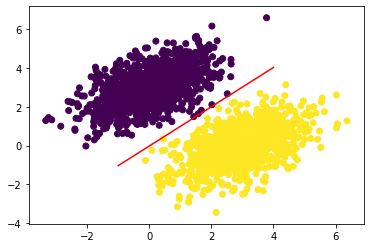

In [108]:
x = np.linspace(-1, 4, 100)  # gleichmäßig gesampelte x-Werte 
y = - W[0] / W[1] * x + (0.5 - b) / W[1]  # y-Werte 

plt.plot(x, y, '-r')
plt.scatter(test_inputs[:, 0], test_inputs[:, 1], c=predictions[:, 0] > 0.5)
plt.show()

In [42]:
W

<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[ 0.19983366],
       [-0.09720696]], dtype=float32)>